<a href="https://colab.research.google.com/github/RedLeader962/T13-Deep-Learning-Project/blob/T13PRO-146-colab-notebook-automated-experimentation-setup/experiment_runner/RUDDER_exp_colab_runner_Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab `team13twin-rudder` experiment runner

### Jupyter notebook stuff

In [1]:
# Load and turn ON IPython autoreload
#   %autoreload 0 - disables the auto-reloading. This is the default setting
#   %autoreload 1 - it will only auto-reload modules that were imported using the %aimport function (e.g %aimport my_module).
#   %autoreload 2 - auto-reload all the modules
#
#   Alternative:
#   ```
#   import importlib
#   importlib.reload(my_module)
#   ```
# source: https://switowski.com/blog/ipython-autoreload
# %load_ext autoreload
# %autoreload 2
#
# %matplotlib inline

### Clone `T13-Deep-Learning-Project` repository

#### Setup local user

In [2]:
!git config --global user.email "luc.coupal.1@ulaval.ca"
!git config --global user.name "RedLeader962"

In [3]:
import os
from getpass import getpass

if not os.path.exists('./codebase'):
    # user = getpass('GitHub user')
    user = 'RedLeader962'
    password = getpass('GitHub password')
    os.environ['GITHUB_AUTH'] = user + ':' + password
    !git clone -l -s --branch T13PRO-146-colab-notebook-automated-experimentation-setup https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git cloned-repo

    %cd cloned-repo
    !ls
else:
    print("››› T13-Deep-Learning-Project.git is already cloned")

GitHub password··········
Cloning into 'cloned-repo'...
remote: Enumerating objects: 2025, done.
remote: Counting objects: 100% (2025/2025), done.
remote: Compressing objects: 100% (975/975), done.
remote: Total 2025 (delta 1320), reused 1698 (delta 1009), pack-reused 0
Receiving objects: 100% (2025/2025), 82.84 MiB | 19.11 MiB/s, done.
Resolving deltas: 100% (1320/1320), done.
Checking out files: 100% (309/309), done.
/content/cloned-repo
Backup_trajectories_Do_Not_Delete_or_Change  remote_experiment_runner
codebase				     requirements.txt
experiment				     script
__init__.py				     tests
README.md


#### Pull repo update when needed

In [4]:
!git pull https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git

From https://github.com/RedLeader962/T13-Deep-Learning-Project
 * branch            HEAD       -> FETCH_HEAD
Already up to date!
hint: Waiting for your editor to close the file... error: unable to start editor 'editor'
Not committing merge; use 'git commit' to complete the merge.


#### Test `T13-Deep-Learning-Project` cloning procedure

In [5]:
from experiment_runner.experiment_runner_utils import check_repository_pulled_to_local_drive_ok
check_repository_pulled_to_local_drive_ok()

hellooooowwwwwww RedLeader962!


------------------------------------------------------------------------------------------------------------------------

In [6]:
## Check l'état du GPU en loop à tout les 10sec
# !watch -n10.0 nvidia-smi

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Fri Apr 30 08:48:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

------------------------------------------------------------------------------------------------------------------------
# `lstm` model baseline experimentation

In [7]:
import dataclasses

import torch
import numpy as np
import random

from codebase import rudder as rd
from experiment_runner.experiment_spec import (
    ExperimentSpec,
    PpoExperimentSpec,
    RudderExperimentSpec,
    RudderLstmExperimentSpec,
    PpoRudderExperimentSpec
    )

from experiment_runner.parameter_search_map import (
    PpoRudderParameterSearchMap,
    RudderLstmParameterSearchMap
    )

from experiment_runner.colab_spec_configuration import colab_specs
from experiment_runner.experiment_runner_utils import execute_experiment_plan, execute_parameter_search
from script.Script_run_LSTM import main as script_rudder_lstm_main
from script.Script_run_ppo_with_rudder import main as script_rudder_run_ppo_with_rudder_main



In [8]:
"""
Check all available field in `experiment_runner/experiment_spec.py`
"""

# colab_specs = RudderLstmParameterSearchMap(
#         env_name="CartPole-v1",
#         env_batch_size=lambda: random.choice([4,6,8,10]),
#         model_hidden_size=lambda: random.choice([10, 15, 20, 25, 30, 40]),
#         env_n_trajectories=lambda: random.choice([3000,4000,5000,]),
#         env_perct_optimal=lambda: random.choice([0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.7,]),
#         env_rew_factor=lambda: random.choice([1.0,1.0, 0.1, 0.01, ]),
#         n_epoches=lambda: random.choice([20,40,60,]),
#         optimizer_weight_decay=lambda: random.choice([1e-1, 1e-2]),
#         optimizer_lr=1e-3,
#         show_plot=True,
#         # seed=42,
#         seed=None,
#         )

In [9]:
exp_spec = colab_specs



---
---
# Exp 1

---
## :: Hparam:

In [10]:
print(exp_spec)

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 30
           env_n_trajectories : 3000
            env_perct_optimal : 0.4
               env_rew_factor : 1.0
                    n_epoches : 60
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                    n_epoches : <function <lambda> at 0x7f1da9f50b90>
       optimizer_weight_decay : <function <lambda> at 0x7f1da9f50c20>
     

#### Run

In [11]:
import os
os.getcwd()
os.listdir(os.getcwd())
# script_rudder_lstm_main(exp_spec)



['codebase',
 'experiment',
 'tests',
 'Backup_trajectories_Do_Not_Delete_or_Change',
 '.git',
 '.gitignore',
 'remote_experiment_runner',
 'README.md',
 'requirements.txt',
 '__init__.py',
 'script']



:::: (1/50) Start experiment 2 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 1
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 10
           env_n_trajectories : 3000
            env_perct_optimal : 0.4
               env_rew_factor : 0.01
                    n_epoches : 300
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

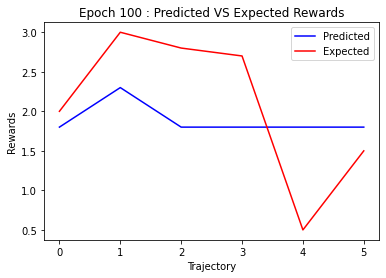

Epoch : 100, loss_train:   0.5264, loss test:   0.1291
Epoch : 101, loss_train:   0.5264, loss test:   0.1291
Epoch : 102, loss_train:   0.5264, loss test:   0.1291
Epoch : 103, loss_train:   0.5264, loss test:   0.1291
Epoch : 104, loss_train:   0.5264, loss test:   0.1291
Epoch : 105, loss_train:   0.5264, loss test:   0.1291
Epoch : 106, loss_train:   0.5264, loss test:   0.1291
Epoch : 107, loss_train:   0.5264, loss test:   0.1291
Epoch : 108, loss_train:   0.5264, loss test:   0.1291
Epoch : 109, loss_train:   0.5264, loss test:   0.1291
Epoch : 110, loss_train:   0.5264, loss test:   0.1291
Epoch : 111, loss_train:   0.5264, loss test:   0.1291
Epoch : 112, loss_train:   0.5264, loss test:   0.1291
Epoch : 113, loss_train:   0.5264, loss test:   0.1291
Epoch : 114, loss_train:   0.5264, loss test:   0.1291
Epoch : 115, loss_train:   0.5264, loss test:   0.1291
Epoch : 116, loss_train:   0.5264, loss test:   0.1291
Epoch : 117, loss_train:   0.5264, loss test:   0.1291
Epoch : 11

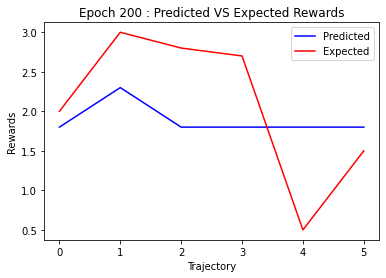

Epoch : 200, loss_train:   0.5264, loss test:   0.1291
Epoch : 201, loss_train:   0.5264, loss test:   0.1291
Epoch : 202, loss_train:   0.5264, loss test:   0.1291
Epoch : 203, loss_train:   0.5264, loss test:   0.1291
Epoch : 204, loss_train:   0.5264, loss test:   0.1291
Epoch : 205, loss_train:   0.5264, loss test:   0.1291
Epoch : 206, loss_train:   0.5264, loss test:   0.1291
Epoch : 207, loss_train:   0.5264, loss test:   0.1291
Epoch : 208, loss_train:   0.5264, loss test:   0.1291
Epoch : 209, loss_train:   0.5264, loss test:   0.1291
Epoch : 210, loss_train:   0.5264, loss test:   0.1291
Epoch : 211, loss_train:   0.5264, loss test:   0.1291
Epoch : 212, loss_train:   0.5264, loss test:   0.1291
Epoch : 213, loss_train:   0.5264, loss test:   0.1291
Epoch : 214, loss_train:   0.5264, loss test:   0.1291
Epoch : 215, loss_train:   0.5264, loss test:   0.1291
Epoch : 216, loss_train:   0.5264, loss test:   0.1291
Epoch : 217, loss_train:   0.5264, loss test:   0.1291
Epoch : 21

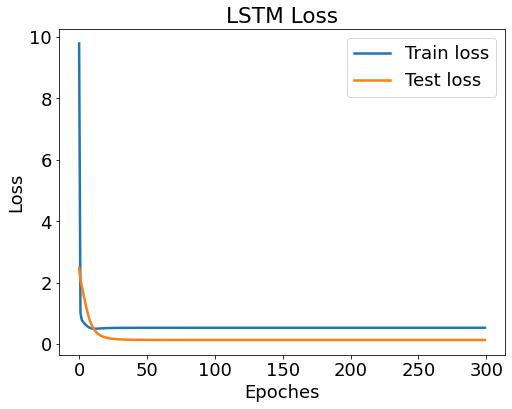



:::: (2/50) Start experiment 3 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 2
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 30
           env_n_trajectories : 5000
            env_perct_optimal : 0.5
               env_rew_factor : 1.0
                    n_epoches : 400
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.1
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

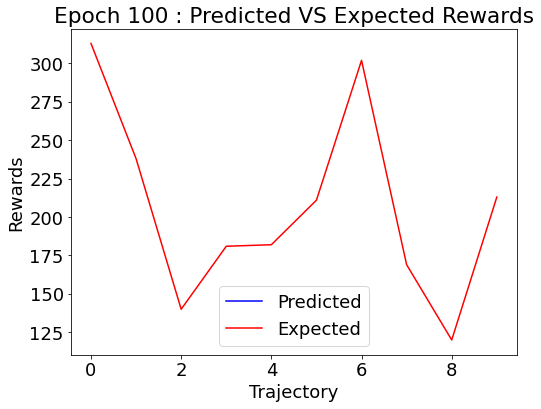

Epoch : 100, loss_train:      nan, loss test:      nan
Epoch : 101, loss_train:      nan, loss test:      nan
Epoch : 102, loss_train:      nan, loss test:      nan
Epoch : 103, loss_train:      nan, loss test:      nan
Epoch : 104, loss_train:      nan, loss test:      nan
Epoch : 105, loss_train:      nan, loss test:      nan
Epoch : 106, loss_train:      nan, loss test:      nan
Epoch : 107, loss_train:      nan, loss test:      nan
Epoch : 108, loss_train:      nan, loss test:      nan
Epoch : 109, loss_train:      nan, loss test:      nan
Epoch : 110, loss_train:      nan, loss test:      nan
Epoch : 111, loss_train:      nan, loss test:      nan
Epoch : 112, loss_train:      nan, loss test:      nan
Epoch : 113, loss_train:      nan, loss test:      nan
Epoch : 114, loss_train:      nan, loss test:      nan
Epoch : 115, loss_train:      nan, loss test:      nan
Epoch : 116, loss_train:      nan, loss test:      nan
Epoch : 117, loss_train:      nan, loss test:      nan
Epoch : 11

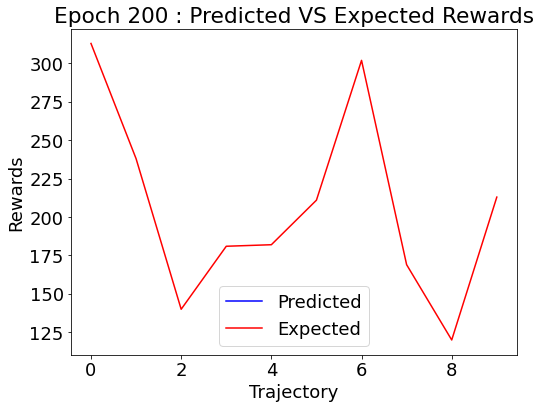

Epoch : 200, loss_train:      nan, loss test:      nan
Epoch : 201, loss_train:      nan, loss test:      nan
Epoch : 202, loss_train:      nan, loss test:      nan
Epoch : 203, loss_train:      nan, loss test:      nan
Epoch : 204, loss_train:      nan, loss test:      nan
Epoch : 205, loss_train:      nan, loss test:      nan
Epoch : 206, loss_train:      nan, loss test:      nan
Epoch : 207, loss_train:      nan, loss test:      nan
Epoch : 208, loss_train:      nan, loss test:      nan
Epoch : 209, loss_train:      nan, loss test:      nan
Epoch : 210, loss_train:      nan, loss test:      nan
Epoch : 211, loss_train:      nan, loss test:      nan
Epoch : 212, loss_train:      nan, loss test:      nan
Epoch : 213, loss_train:      nan, loss test:      nan
Epoch : 214, loss_train:      nan, loss test:      nan
Epoch : 215, loss_train:      nan, loss test:      nan
Epoch : 216, loss_train:      nan, loss test:      nan
Epoch : 217, loss_train:      nan, loss test:      nan
Epoch : 21

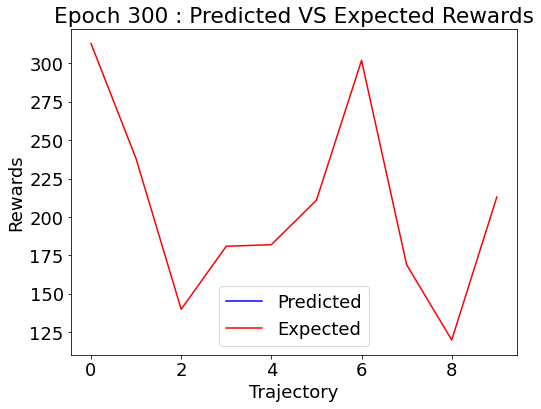

Epoch : 300, loss_train:      nan, loss test:      nan
Epoch : 301, loss_train:      nan, loss test:      nan
Epoch : 302, loss_train:      nan, loss test:      nan
Epoch : 303, loss_train:      nan, loss test:      nan
Epoch : 304, loss_train:      nan, loss test:      nan
Epoch : 305, loss_train:      nan, loss test:      nan
Epoch : 306, loss_train:      nan, loss test:      nan
Epoch : 307, loss_train:      nan, loss test:      nan
Epoch : 308, loss_train:      nan, loss test:      nan
Epoch : 309, loss_train:      nan, loss test:      nan
Epoch : 310, loss_train:      nan, loss test:      nan
Epoch : 311, loss_train:      nan, loss test:      nan
Epoch : 312, loss_train:      nan, loss test:      nan
Epoch : 313, loss_train:      nan, loss test:      nan
Epoch : 314, loss_train:      nan, loss test:      nan
Epoch : 315, loss_train:      nan, loss test:      nan
Epoch : 316, loss_train:      nan, loss test:      nan
Epoch : 317, loss_train:      nan, loss test:      nan
Epoch : 31

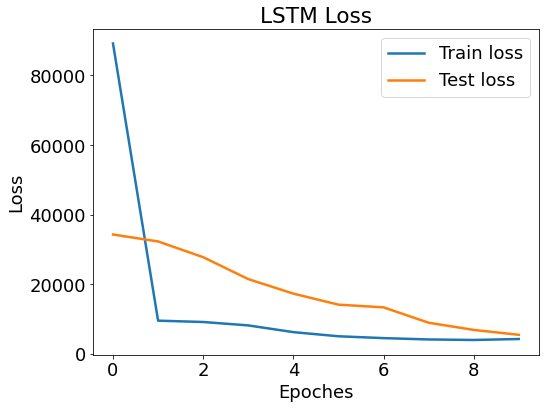



:::: (3/50) Start experiment 4 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 3
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 30
           env_n_trajectories : 4000
            env_perct_optimal : 0.7
               env_rew_factor : 1.0
                    n_epoches : 20
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                

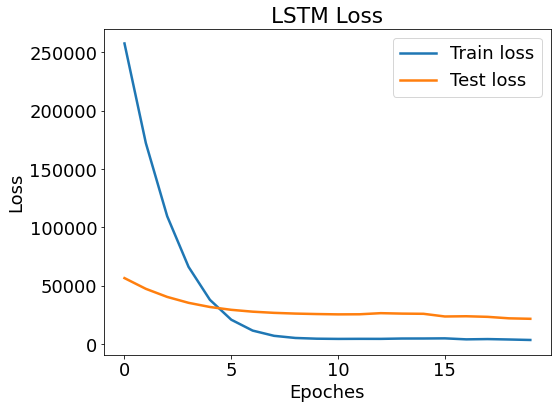



:::: (4/50) Start experiment 5 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 4
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 20
           env_n_trajectories : 5000
            env_perct_optimal : 0.5
               env_rew_factor : 1.0
                    n_epoches : 60
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
              

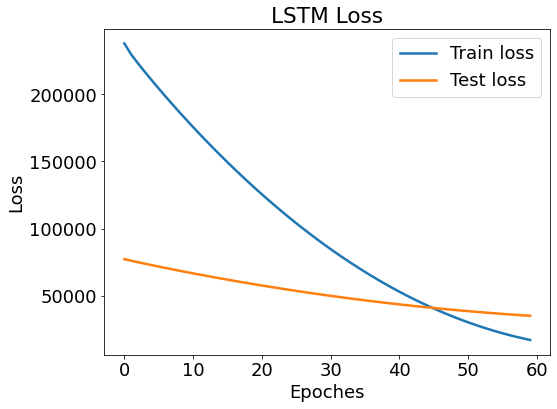



:::: (5/50) Start experiment 6 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 5
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 20
           env_n_trajectories : 4000
            env_perct_optimal : 0.3
               env_rew_factor : 0.1
                    n_epoches : 600
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

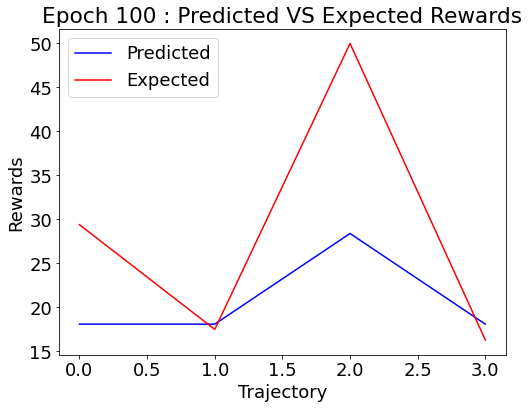

Epoch : 100, loss_train:  36.9990, loss test:  13.7788
Epoch : 101, loss_train:  45.0427, loss test:  18.6740
Epoch : 102, loss_train:  41.5009, loss test:  12.5604
Epoch : 103, loss_train:  45.6544, loss test:  13.9050
Epoch : 104, loss_train:  40.6395, loss test:  13.7631
Epoch : 105, loss_train:  42.4368, loss test:  14.2019
Epoch : 106, loss_train:  43.8339, loss test:  13.4013
Epoch : 107, loss_train:  41.9812, loss test:  13.2372
Epoch : 108, loss_train:  41.4521, loss test:  14.4113
Epoch : 109, loss_train:  41.9099, loss test:  12.6190
Epoch : 110, loss_train:  41.1217, loss test:  13.0149
Epoch : 111, loss_train:  40.6195, loss test:  11.6884
Epoch : 112, loss_train:  40.6189, loss test:  12.8679
Epoch : 113, loss_train:  40.6337, loss test:  13.4988
Epoch : 114, loss_train:  39.9586, loss test:  12.4558
Epoch : 115, loss_train:  41.0090, loss test:  13.0174
Epoch : 116, loss_train:  42.6527, loss test:  11.5553
Epoch : 117, loss_train:  43.6460, loss test:  11.0193
Epoch : 11

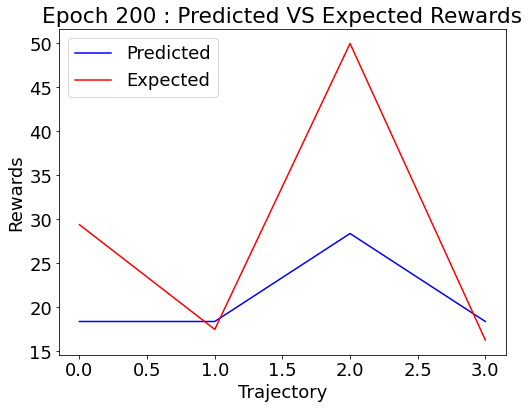

Epoch : 200, loss_train:  43.8197, loss test:  11.9878
Epoch : 201, loss_train:  42.0060, loss test:  12.4397
Epoch : 202, loss_train:  42.4447, loss test:  12.7767
Epoch : 203, loss_train:  42.8631, loss test:  11.6109
Epoch : 204, loss_train:  42.3548, loss test:  10.4442
Epoch : 205, loss_train:  38.8030, loss test:   9.5599
Epoch : 206, loss_train:  40.3716, loss test:  10.1837
Epoch : 207, loss_train:  41.0126, loss test:  10.2669
Epoch : 208, loss_train:  44.5979, loss test:  10.4518
Epoch : 209, loss_train:  42.9057, loss test:  10.6516
Epoch : 210, loss_train:  40.6054, loss test:  11.0938
Epoch : 211, loss_train:  41.4112, loss test:  10.9055
Epoch : 212, loss_train:  39.8396, loss test:  10.2699
Epoch : 213, loss_train:  41.8954, loss test:   9.5328
Epoch : 214, loss_train:  43.3149, loss test:   7.6926
Epoch : 215, loss_train:  42.4018, loss test:   9.6603
Epoch : 216, loss_train:  39.6381, loss test:   9.9465
Epoch : 217, loss_train:  41.6371, loss test:  10.3785
Epoch : 21

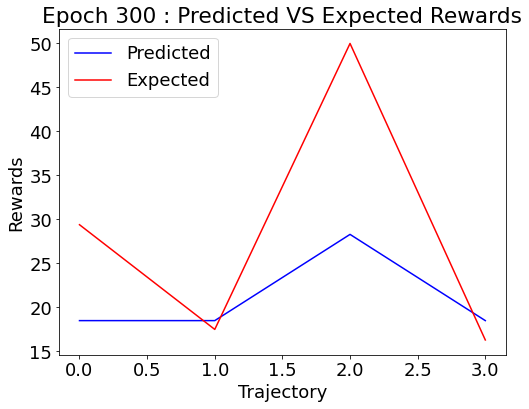

Epoch : 300, loss_train:  43.1143, loss test:  10.9481
Epoch : 301, loss_train:  42.4105, loss test:  10.7619
Epoch : 302, loss_train:  42.3659, loss test:  12.0176
Epoch : 303, loss_train:  41.7827, loss test:  11.8481
Epoch : 304, loss_train:  41.5159, loss test:  11.7039
Epoch : 305, loss_train:  42.2896, loss test:  10.2059
Epoch : 306, loss_train:  40.6737, loss test:  11.1589
Epoch : 307, loss_train:  42.3329, loss test:  10.3489
Epoch : 308, loss_train:  41.6957, loss test:  11.3167
Epoch : 309, loss_train:  40.9888, loss test:  10.9512
Epoch : 310, loss_train:  42.8246, loss test:  11.7058
Epoch : 311, loss_train:  40.8005, loss test:  11.3407
Epoch : 312, loss_train:  43.3348, loss test:  11.0534
Epoch : 313, loss_train:  40.8761, loss test:  11.1465
Epoch : 314, loss_train:  42.6153, loss test:  10.6195
Epoch : 315, loss_train:  42.5735, loss test:  11.0285
Epoch : 316, loss_train:  43.0746, loss test:  10.6014
Epoch : 317, loss_train:  40.3981, loss test:   9.7480
Epoch : 31

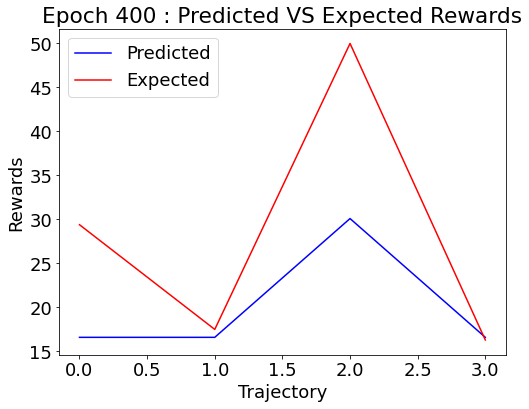

Epoch : 400, loss_train:  52.5426, loss test:  26.7792
Epoch : 401, loss_train:  47.5694, loss test:  22.7599
Epoch : 402, loss_train:  46.1939, loss test:  20.5002
Epoch : 403, loss_train:  48.1305, loss test:  20.7636
Epoch : 404, loss_train:  47.1570, loss test:  18.2059
Epoch : 405, loss_train:  43.9573, loss test:  17.6525
Epoch : 406, loss_train:  43.2714, loss test:  16.2488
Epoch : 407, loss_train:  41.8133, loss test:  14.9550
Epoch : 408, loss_train:  40.1182, loss test:  14.0599
Epoch : 409, loss_train:  41.7823, loss test:  13.2278
Epoch : 410, loss_train:  45.2974, loss test:  15.3268
Epoch : 411, loss_train:  39.8380, loss test:  14.1130
Epoch : 412, loss_train:  42.3486, loss test:  15.6157
Epoch : 413, loss_train:  43.2225, loss test:  13.5925
Epoch : 414, loss_train:  42.3060, loss test:  12.2242
Epoch : 415, loss_train:  40.6657, loss test:  12.0514
Epoch : 416, loss_train:  43.3026, loss test:  13.1891
Epoch : 417, loss_train:  40.5932, loss test:  13.3015
Epoch : 41

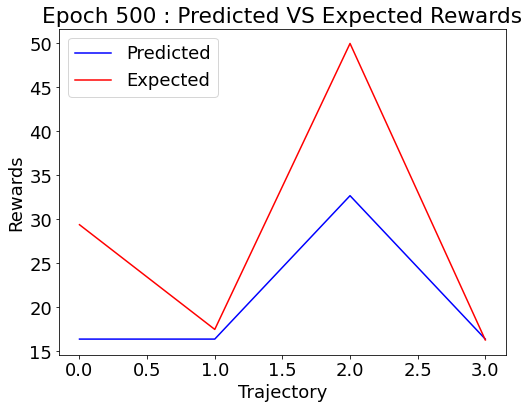

Epoch : 500, loss_train:  42.3072, loss test:  28.6490
Epoch : 501, loss_train:  41.5362, loss test:  28.7205
Epoch : 502, loss_train:  38.5276, loss test:  28.7930
Epoch : 503, loss_train:  38.0970, loss test:  26.3862
Epoch : 504, loss_train:  38.6767, loss test:  27.5025
Epoch : 505, loss_train:  38.2721, loss test:  28.1086
Epoch : 506, loss_train:  37.4555, loss test:  26.8241
Epoch : 507, loss_train:  35.8137, loss test:  26.3516
Epoch : 508, loss_train:  36.0743, loss test:  23.5660
Epoch : 509, loss_train:  36.2758, loss test:  23.7912
Epoch : 510, loss_train:  41.6151, loss test:  20.5474
Epoch : 511, loss_train:  38.3068, loss test:  24.0882
Epoch : 512, loss_train:  38.3016, loss test:  27.0384
Epoch : 513, loss_train:  40.4458, loss test:  21.7212
Epoch : 514, loss_train:  32.9151, loss test:  22.3361
Epoch : 515, loss_train:  36.8918, loss test:  19.1937
Epoch : 516, loss_train:  36.9905, loss test:  17.3414
Epoch : 517, loss_train:  34.6066, loss test:  19.0269
Epoch : 51

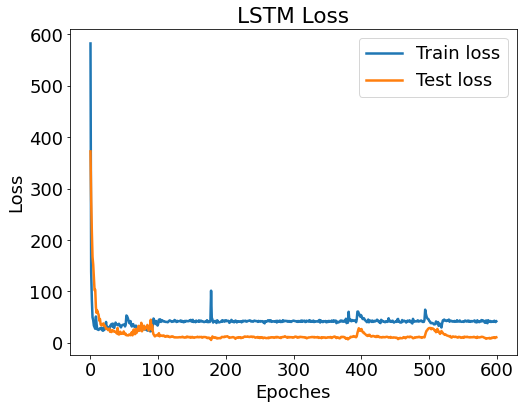



:::: (6/50) Start experiment 7 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 6
                     env_name : CartPole-v1
               env_batch_size : 8
            model_hidden_size : 60
           env_n_trajectories : 4000
            env_perct_optimal : 0.3
               env_rew_factor : 0.1
                    n_epoches : 300
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

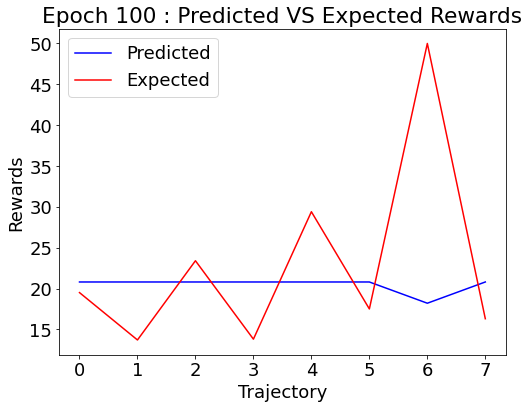

Epoch : 100, loss_train:  25.1278, loss test:   2.8978
Epoch : 101, loss_train:  28.3908, loss test:   2.4410
Epoch : 102, loss_train:  30.7909, loss test:   2.4249
Epoch : 103, loss_train:  38.1504, loss test:   2.0932
Epoch : 104, loss_train:  44.7382, loss test:   6.2480
Epoch : 105, loss_train:  38.0557, loss test:   3.7118
Epoch : 106, loss_train:  39.0743, loss test:   3.4876
Epoch : 107, loss_train:  33.6907, loss test:   6.4612
Epoch : 108, loss_train:  31.1924, loss test:   9.9618
Epoch : 109, loss_train:  28.5486, loss test:   7.6531
Epoch : 110, loss_train:  26.9134, loss test:   7.2666
Epoch : 111, loss_train:  26.3682, loss test:   6.5430
Epoch : 112, loss_train:  26.2654, loss test:   5.1787
Epoch : 113, loss_train:  27.1698, loss test:   6.9363
Epoch : 114, loss_train:  24.8784, loss test:   4.1959
Epoch : 115, loss_train:  27.4259, loss test:   1.4777
Epoch : 116, loss_train:  28.4885, loss test:   1.9002
Epoch : 117, loss_train:  30.4620, loss test:   5.0047
Epoch : 11

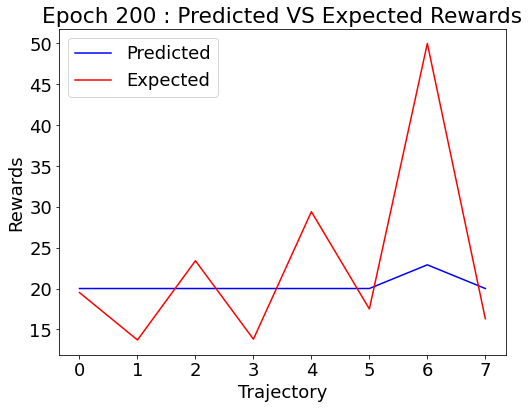

Epoch : 200, loss_train:  25.9645, loss test:   4.6698
Epoch : 201, loss_train:  24.5145, loss test:   5.3277
Epoch : 202, loss_train:  21.9697, loss test:   2.8267
Epoch : 203, loss_train:  20.8274, loss test:   3.6660
Epoch : 204, loss_train:  20.8279, loss test:   2.8900
Epoch : 205, loss_train:  19.2519, loss test:   5.6061
Epoch : 206, loss_train:  17.6423, loss test:   5.2799
Epoch : 207, loss_train:  19.0266, loss test:  11.8727
Epoch : 208, loss_train:  17.7342, loss test:  10.0829
Epoch : 209, loss_train:  17.7448, loss test:   9.4844
Epoch : 210, loss_train:  17.1484, loss test:  22.1724
Epoch : 211, loss_train:  18.5284, loss test:   8.2694
Epoch : 212, loss_train:  21.7214, loss test:   7.1020
Epoch : 213, loss_train:  19.5690, loss test:   7.8877
Epoch : 214, loss_train:  19.4438, loss test:  16.9292
Epoch : 215, loss_train:  19.0410, loss test:  19.4725
Epoch : 216, loss_train:  18.1853, loss test:  14.8333
Epoch : 217, loss_train:  17.0324, loss test:  21.3585
Epoch : 21

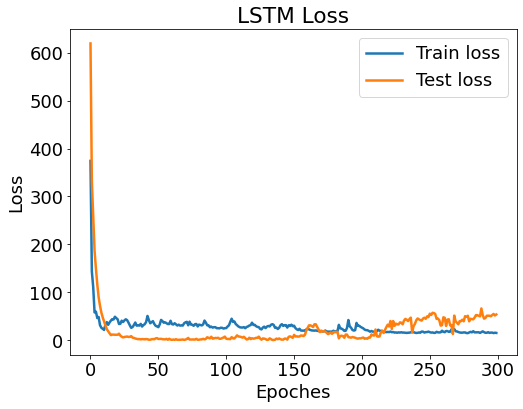



:::: (7/50) Start experiment 8 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 7
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 10
           env_n_trajectories : 4000
            env_perct_optimal : 0.7
               env_rew_factor : 0.1
                    n_epoches : 60
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                

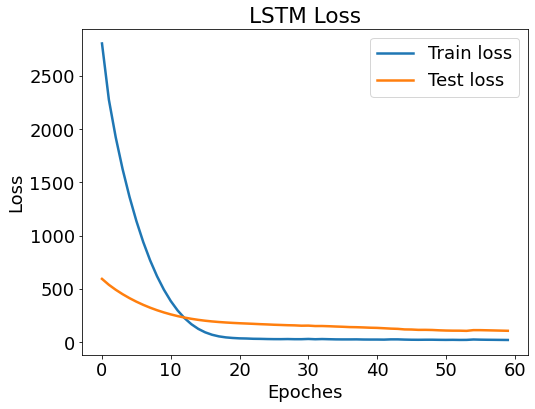



:::: (8/50) Start experiment 9 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 8
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 60
           env_n_trajectories : 4000
            env_perct_optimal : 0.7
               env_rew_factor : 0.01
                    n_epoches : 40
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.1
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                

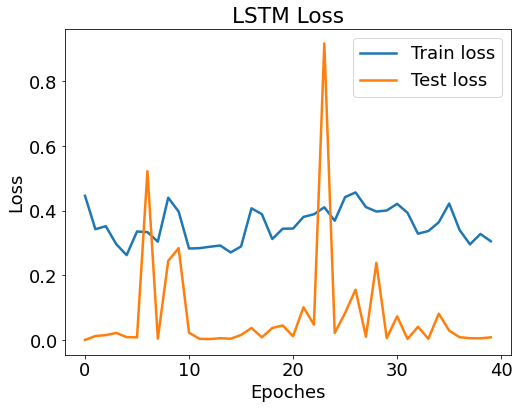



:::: (9/50) Start experiment 10 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 9
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 10
           env_n_trajectories : 5000
            env_perct_optimal : 0.4
               env_rew_factor : 1.0
                    n_epoches : 400
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                

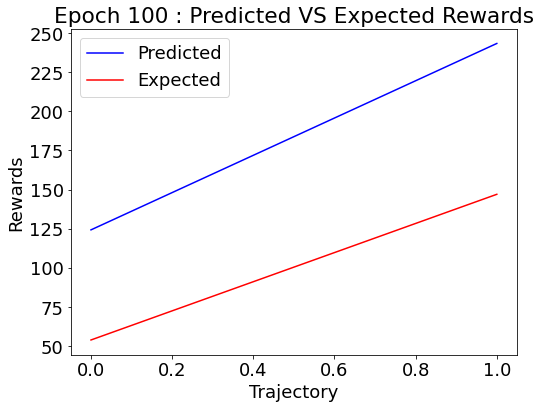

Epoch : 100, loss_train: 2200.8687, loss test: 6208.0620
Epoch : 101, loss_train: 2207.2056, loss test: 6259.6455
Epoch : 102, loss_train: 2164.5830, loss test: 5446.0903
Epoch : 103, loss_train: 3133.1328, loss test: 5815.9995
Epoch : 104, loss_train: 2221.4697, loss test: 5990.7363
Epoch : 105, loss_train: 2160.7244, loss test: 6497.6426
Epoch : 106, loss_train: 2575.3708, loss test: 5829.6421
Epoch : 107, loss_train: 3639.4663, loss test: 5827.1704
Epoch : 108, loss_train: 2542.1602, loss test: 5802.1528
Epoch : 109, loss_train: 2491.9685, loss test: 5327.7466
Epoch : 110, loss_train: 2397.7029, loss test: 5721.9531
Epoch : 111, loss_train: 2448.6843, loss test: 5552.4922
Epoch : 112, loss_train: 2534.8582, loss test: 5381.8506
Epoch : 113, loss_train: 2277.9890, loss test: 5690.0195
Epoch : 114, loss_train: 2240.9624, loss test: 5524.0039
Epoch : 115, loss_train: 2182.0854, loss test: 4921.4209
Epoch : 116, loss_train: 2127.2734, loss test: 5031.7935
Epoch : 117, loss_train: 2080.2

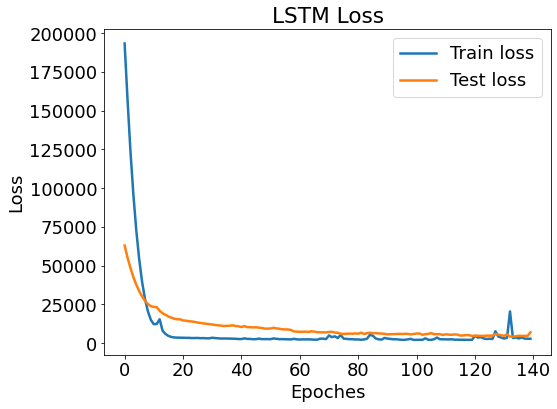



:::: (13/50) Start experiment 14 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 13
                     env_name : CartPole-v1
               env_batch_size : 8
            model_hidden_size : 20
           env_n_trajectories : 5000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 400
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.1
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

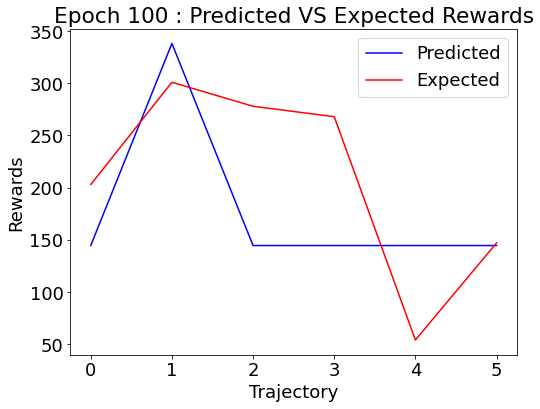

Epoch : 100, loss_train: 4574.5972, loss test: 3983.7480
Epoch : 101, loss_train: 4693.0171, loss test: 3891.3110
Epoch : 102, loss_train: 4641.7993, loss test: 3662.3245
Epoch : 103, loss_train: 5110.0713, loss test: 3533.7217
Epoch : 104, loss_train: 4685.0605, loss test: 3657.6560
Epoch : 105, loss_train: 4671.9814, loss test: 3690.1135
Epoch : 106, loss_train: 4671.4946, loss test: 3751.6267
Epoch : 107, loss_train: 4748.4473, loss test: 3811.3804
Epoch : 108, loss_train: 4443.3960, loss test: 3828.9326
Epoch : 109, loss_train: 4390.4648, loss test: 3800.1284
Epoch : 110, loss_train: 4151.0381, loss test: 3693.6282
Epoch : 111, loss_train: 4219.5586, loss test: 3620.6372
Epoch : 112, loss_train: 4394.4844, loss test: 3250.7534
Epoch : 113, loss_train: 11055.5273, loss test: 2317.2002
Epoch : 114, loss_train: 4997.0854, loss test: 2559.6387
Epoch : 115, loss_train: 4691.2778, loss test: 2799.0352
Epoch : 116, loss_train: 4569.6313, loss test: 3076.6758
Epoch : 117, loss_train: 4455.

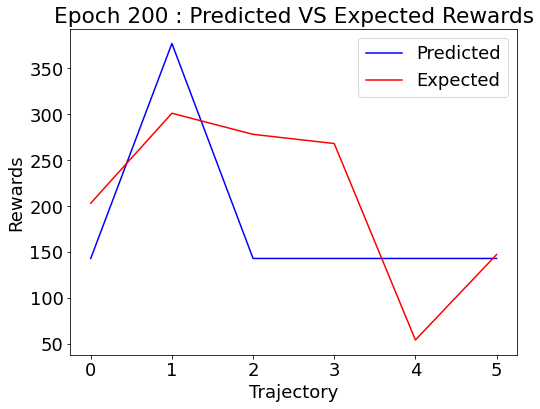

Epoch : 200, loss_train: 4894.0200, loss test: 4253.2515
Epoch : 201, loss_train: 4891.9351, loss test: 4291.1060
Epoch : 202, loss_train: 4937.0625, loss test: 4340.6265
Epoch : 203, loss_train: 4912.5107, loss test: 4383.9224
Epoch : 204, loss_train: 4926.2324, loss test: 4420.8687
Epoch : 205, loss_train: 4928.7305, loss test: 4451.2993
Epoch : 206, loss_train: 4930.5864, loss test: 4476.3667
Epoch : 207, loss_train: 4932.6035, loss test: 4496.6660
Epoch : 208, loss_train: 4936.8140, loss test: 4512.9463
Epoch : 209, loss_train: 4954.2373, loss test: 4514.0562
Epoch : 210, loss_train: 4930.9722, loss test: 4498.2368
Epoch : 211, loss_train: 4877.9160, loss test: 4472.9106
Epoch : 212, loss_train: 4836.6802, loss test: 4430.8833
Epoch : 213, loss_train: 4803.7974, loss test: 4396.8599
Epoch : 214, loss_train: 4748.2544, loss test: 4360.7061
Epoch : 215, loss_train:      nan, loss test:      nan
Epoch : 216, loss_train:      nan, loss test:      nan
Epoch : 217, loss_train:      nan, 

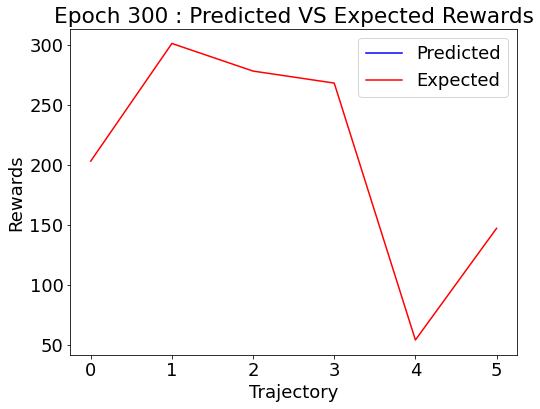

Epoch : 300, loss_train:      nan, loss test:      nan
Epoch : 301, loss_train:      nan, loss test:      nan
Epoch : 302, loss_train:      nan, loss test:      nan
Epoch : 303, loss_train:      nan, loss test:      nan
Epoch : 304, loss_train:      nan, loss test:      nan
Epoch : 305, loss_train:      nan, loss test:      nan
Epoch : 306, loss_train:      nan, loss test:      nan
Epoch : 307, loss_train:      nan, loss test:      nan
Epoch : 308, loss_train:      nan, loss test:      nan
Epoch : 309, loss_train:      nan, loss test:      nan
Epoch : 310, loss_train:      nan, loss test:      nan
Epoch : 311, loss_train:      nan, loss test:      nan
Epoch : 312, loss_train:      nan, loss test:      nan
Epoch : 313, loss_train:      nan, loss test:      nan
Epoch : 314, loss_train:      nan, loss test:      nan
Epoch : 315, loss_train:      nan, loss test:      nan
Epoch : 316, loss_train:      nan, loss test:      nan
Epoch : 317, loss_train:      nan, loss test:      nan
Epoch : 31

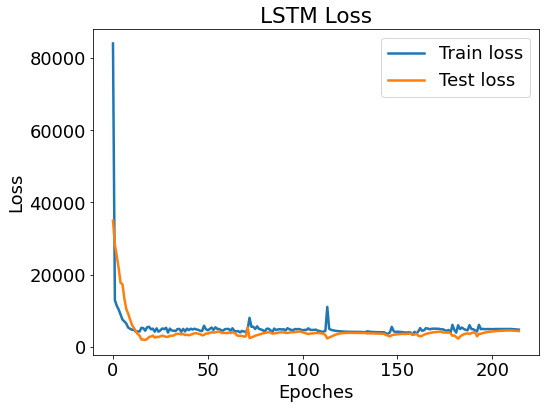



:::: (15/50) Start experiment 16 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 15
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 25
           env_n_trajectories : 4000
            env_perct_optimal : 0.6
               env_rew_factor : 1.0
                    n_epoches : 80
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

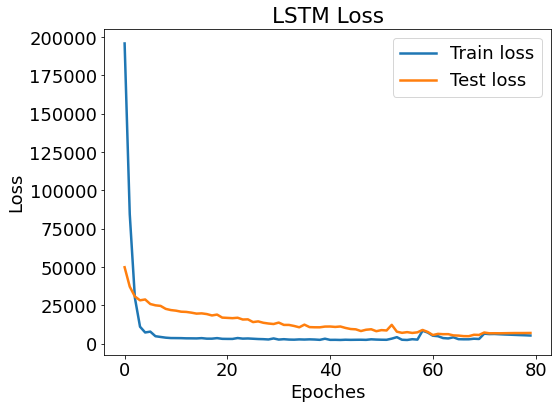



:::: (16/50) Start experiment 17 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 16
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 10
           env_n_trajectories : 3000
            env_perct_optimal : 0.5
               env_rew_factor : 1.0
                    n_epoches : 200
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

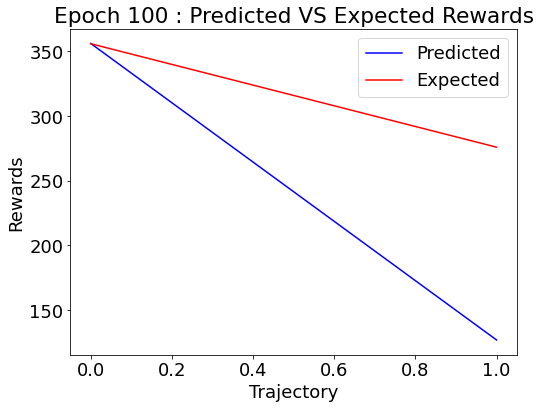

Epoch : 100, loss_train: 2241.5964, loss test: 5637.4932
Epoch : 101, loss_train: 2273.3052, loss test: 4530.2427
Epoch : 102, loss_train: 2164.6428, loss test: 4446.1895
Epoch : 103, loss_train: 2159.4226, loss test: 4411.4136
Epoch : 104, loss_train: 2143.2002, loss test: 4106.0786
Epoch : 105, loss_train: 2269.6160, loss test: 5519.8374
Epoch : 106, loss_train: 2705.7234, loss test: 4070.8005
Epoch : 107, loss_train: 2229.5178, loss test: 4141.0732
Epoch : 108, loss_train: 2183.0388, loss test: 4055.3540
Epoch : 109, loss_train: 2138.1304, loss test: 3991.2693
Epoch : 110, loss_train: 2120.4087, loss test: 4014.7771
Epoch : 111, loss_train: 2259.4946, loss test: 5912.2324
Epoch : 112, loss_train: 2807.8801, loss test: 5756.2480
Epoch : 113, loss_train: 2502.3000, loss test: 5544.4956
Epoch : 114, loss_train: 2323.4492, loss test: 5216.3545
Epoch : 115, loss_train: 2334.3948, loss test: 4819.7246
Epoch : 116, loss_train: 2294.1921, loss test: 4717.0049
Epoch : 117, loss_train: 2478.3

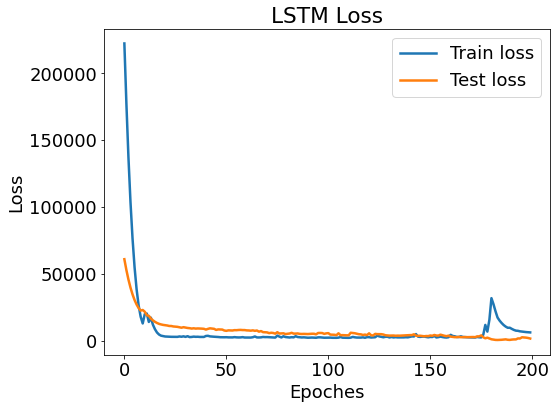



:::: (17/50) Start experiment 18 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 17
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 25
           env_n_trajectories : 3000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 40
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

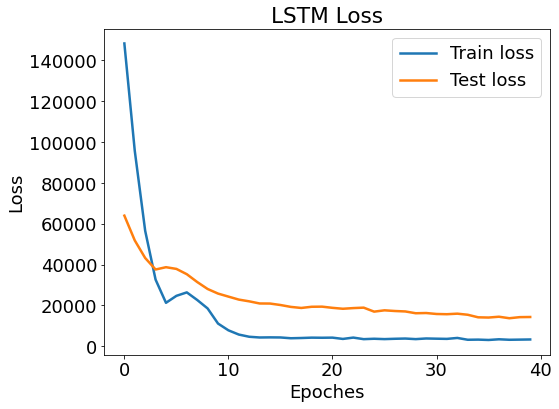



:::: (18/50) Start experiment 19 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 18
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 30
           env_n_trajectories : 4000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 400
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
             

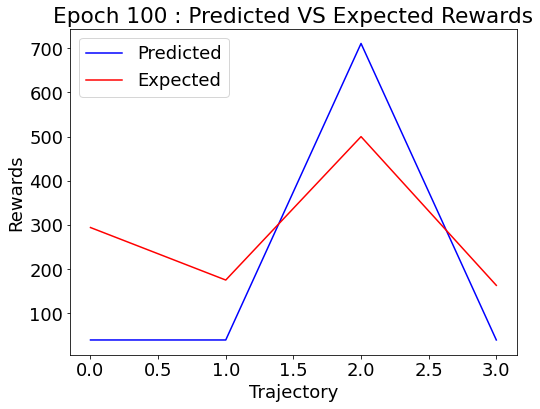

Epoch : 100, loss_train: 4801.1943, loss test: 28997.2871
Epoch : 101, loss_train: 4577.1826, loss test: 28827.7695
Epoch : 102, loss_train: 4506.8833, loss test: 28874.1777
Epoch : 103, loss_train: 4408.1348, loss test: 28735.5898
Epoch : 104, loss_train: 4275.8145, loss test: 28661.6035
Epoch : 105, loss_train: 4322.0293, loss test: 28341.3906
Epoch : 106, loss_train: 4447.1143, loss test: 28370.4258
Epoch : 107, loss_train: 4014.5764, loss test: 28278.2109
Epoch : 108, loss_train: 3860.5540, loss test: 28024.7520
Epoch : 109, loss_train: 4233.0527, loss test: 28183.9297
Epoch : 110, loss_train: 3836.5449, loss test: 28027.7031
Epoch : 111, loss_train: 3675.3342, loss test: 27722.8770
Epoch : 112, loss_train: 3576.2561, loss test: 27699.4883
Epoch : 113, loss_train: 3436.8730, loss test: 28079.7402
Epoch : 114, loss_train: 3400.6611, loss test: 27641.9941
Epoch : 115, loss_train: 3312.9922, loss test: 27767.1172
Epoch : 116, loss_train: 3347.0874, loss test: 27388.4492
Epoch : 117, l

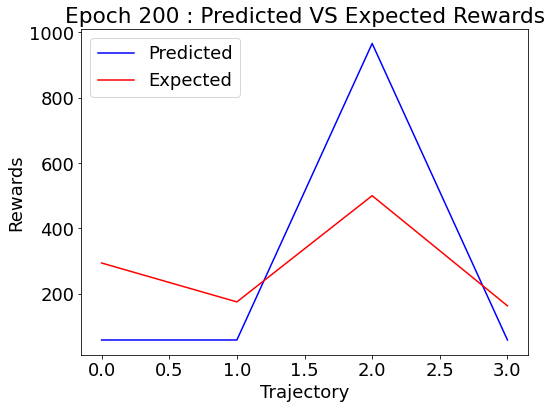

Epoch : 200, loss_train: 1896.8403, loss test: 21196.1426
Epoch : 201, loss_train: 2721.0925, loss test: 21280.5117
Epoch : 202, loss_train: 1804.2383, loss test: 21418.3770
Epoch : 203, loss_train: 1972.7921, loss test: 21257.3398
Epoch : 204, loss_train: 1741.0146, loss test: 21246.0098
Epoch : 205, loss_train: 1803.5189, loss test: 21021.3672
Epoch : 206, loss_train: 1799.0073, loss test: 21022.7383
Epoch : 207, loss_train: 1825.5739, loss test: 20933.1309
Epoch : 208, loss_train: 1778.1294, loss test: 20943.8008
Epoch : 209, loss_train: 1830.4904, loss test: 20719.3809
Epoch : 210, loss_train: 1771.4812, loss test: 20681.7324
Epoch : 211, loss_train: 2393.0684, loss test: 20631.0898
Epoch : 212, loss_train: 1931.2401, loss test: 20809.6621
Epoch : 213, loss_train: 1932.6702, loss test: 20716.0117
Epoch : 214, loss_train: 1724.0923, loss test: 20640.2969
Epoch : 215, loss_train: 1820.1116, loss test: 20551.3047
Epoch : 216, loss_train: 2088.3733, loss test: 20607.1035
Epoch : 217, l

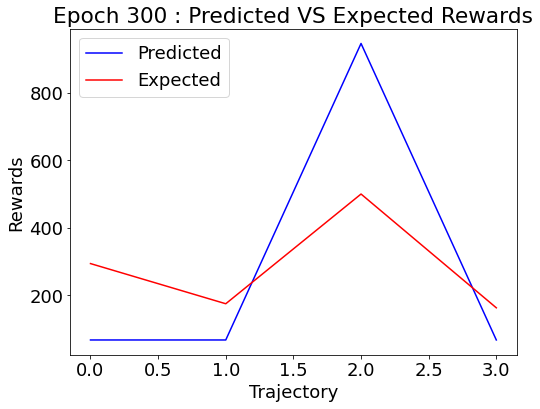

Epoch : 300, loss_train: 1639.7673, loss test: 19646.3535
Epoch : 301, loss_train: 1600.7806, loss test: 19768.8359
Epoch : 302, loss_train: 1672.1864, loss test: 19553.4746
Epoch : 303, loss_train: 1678.8008, loss test: 19846.2676
Epoch : 304, loss_train: 1637.5605, loss test: 19677.1992
Epoch : 305, loss_train: 1734.7866, loss test: 19589.5664
Epoch : 306, loss_train: 1756.2603, loss test: 19857.3164
Epoch : 307, loss_train: 1681.8687, loss test: 19589.5195
Epoch : 308, loss_train: 1615.7926, loss test: 19536.9473
Epoch : 309, loss_train: 1633.1692, loss test: 19271.1289
Epoch : 310, loss_train: 1616.2288, loss test: 19440.1855
Epoch : 311, loss_train: 1565.7297, loss test: 19205.8398
Epoch : 312, loss_train: 1609.2620, loss test: 19124.3789
Epoch : 313, loss_train: 1864.0850, loss test: 18720.9258
Epoch : 314, loss_train: 1613.1350, loss test: 18844.5625
Epoch : 315, loss_train: 1571.1962, loss test: 19179.2266
Epoch : 316, loss_train: 1673.0327, loss test: 18800.4609
Epoch : 317, l

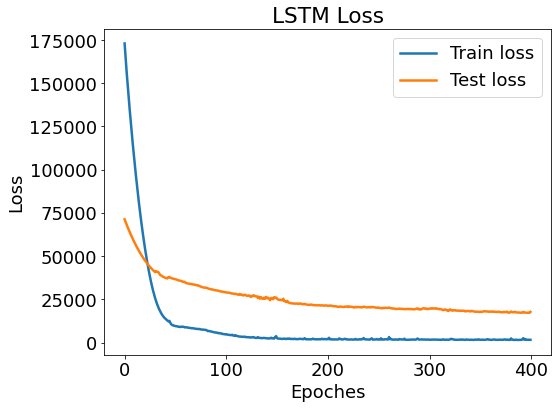



:::: (19/50) Start experiment 20 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 19
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 30
           env_n_trajectories : 3000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 600
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
              

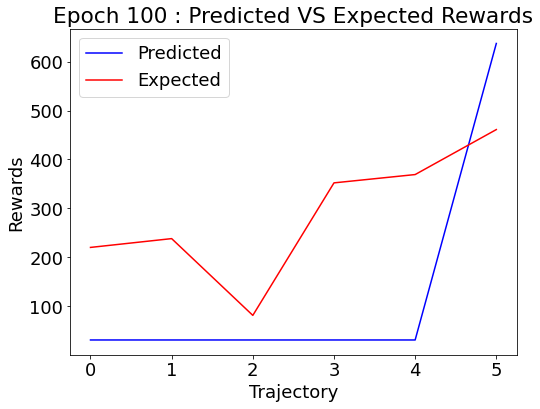

Epoch : 100, loss_train: 6505.4238, loss test: 26458.3105
Epoch : 101, loss_train: 6422.5537, loss test: 26242.5684
Epoch : 102, loss_train: 6517.1880, loss test: 26409.3535
Epoch : 103, loss_train: 6252.4907, loss test: 26045.8008
Epoch : 104, loss_train: 6091.4912, loss test: 25776.5078
Epoch : 105, loss_train: 6046.9004, loss test: 25365.8672
Epoch : 106, loss_train: 5943.3647, loss test: 25244.3281
Epoch : 107, loss_train: 6079.1377, loss test: 25575.9238
Epoch : 108, loss_train: 5891.4893, loss test: 24906.4746
Epoch : 109, loss_train: 5933.8994, loss test: 24847.0781
Epoch : 110, loss_train: 5673.6602, loss test: 24897.1523
Epoch : 111, loss_train: 6290.5225, loss test: 25092.3398
Epoch : 112, loss_train: 5559.5708, loss test: 24404.7969
Epoch : 113, loss_train: 5996.5552, loss test: 24495.0117
Epoch : 114, loss_train: 5495.2310, loss test: 24488.5703
Epoch : 115, loss_train: 5628.0811, loss test: 25104.0371
Epoch : 116, loss_train: 5454.0610, loss test: 25001.3340
Epoch : 117, l

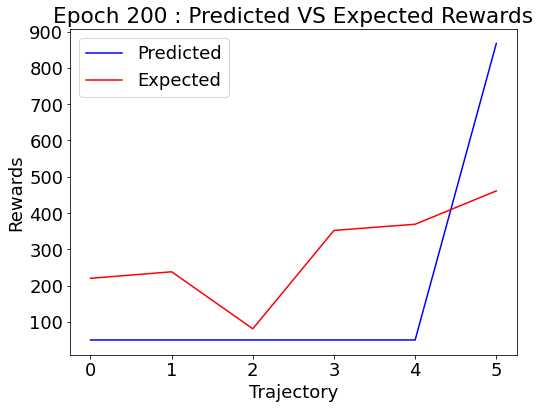

Epoch : 200, loss_train: 2415.9321, loss test: 23507.9805
Epoch : 201, loss_train: 2335.7976, loss test: 24263.5293
Epoch : 202, loss_train: 2938.6448, loss test: 22171.3242
Epoch : 203, loss_train: 2597.3435, loss test: 19773.4844
Epoch : 204, loss_train: 2473.0046, loss test: 22312.9688
Epoch : 205, loss_train: 2899.5349, loss test: 20519.8750
Epoch : 206, loss_train: 2589.9443, loss test: 22826.9570
Epoch : 207, loss_train: 2481.1274, loss test: 21389.7070
Epoch : 208, loss_train: 2320.6528, loss test: 22295.9688
Epoch : 209, loss_train: 2322.1931, loss test: 21276.7754
Epoch : 210, loss_train: 2284.7668, loss test: 23025.8438
Epoch : 211, loss_train: 2464.1184, loss test: 20553.9160
Epoch : 212, loss_train: 2275.0801, loss test: 23901.3594
Epoch : 213, loss_train: 2323.6216, loss test: 24998.0859
Epoch : 214, loss_train: 2224.2227, loss test: 26364.0820
Epoch : 215, loss_train: 2220.2227, loss test: 26569.0781
Epoch : 216, loss_train: 2171.8806, loss test: 26047.7695
Epoch : 217, l

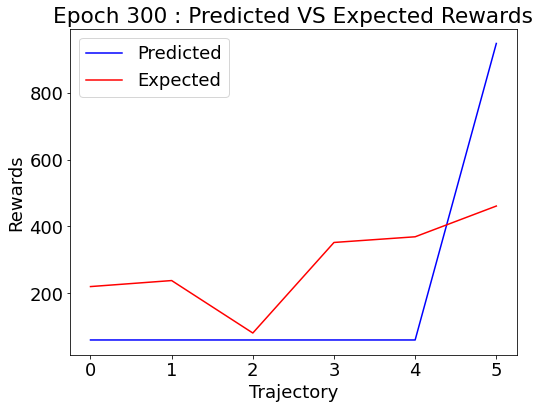

Epoch : 300, loss_train: 2262.5840, loss test: 24335.6484
Epoch : 301, loss_train: 2010.7205, loss test: 20803.3750
Epoch : 302, loss_train: 2004.2042, loss test: 26570.6758
Epoch : 303, loss_train: 1891.1527, loss test: 31392.9531
Epoch : 304, loss_train: 1858.4956, loss test: 31267.9531
Epoch : 305, loss_train: 2018.9242, loss test: 21236.0762
Epoch : 306, loss_train: 2372.6008, loss test: 18251.6289
Epoch : 307, loss_train: 2038.7015, loss test: 20011.1172
Epoch : 308, loss_train: 1972.1138, loss test: 23257.2324
Epoch : 309, loss_train: 1892.4553, loss test: 23955.5137
Epoch : 310, loss_train: 1876.2764, loss test: 20671.3652
Epoch : 311, loss_train: 2423.6743, loss test: 20914.3301
Epoch : 312, loss_train: 2053.1716, loss test: 25411.9062
Epoch : 313, loss_train: 2163.5969, loss test: 24437.6328
Epoch : 314, loss_train: 1957.1447, loss test: 22462.5625
Epoch : 315, loss_train: 1904.4097, loss test: 22062.6875
Epoch : 316, loss_train: 1895.1989, loss test: 22549.1602
Epoch : 317, l

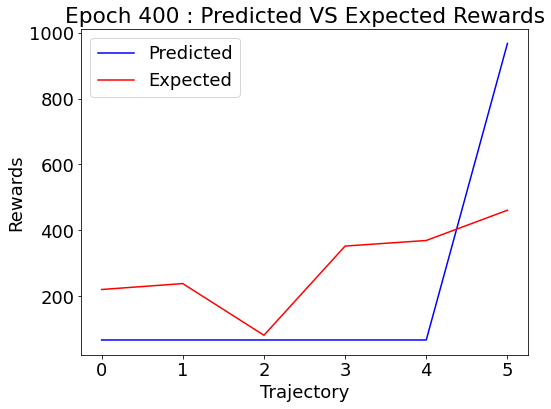

Epoch : 400, loss_train: 2023.1499, loss test: 23286.7402
Epoch : 401, loss_train: 1757.8846, loss test: 17451.3594
Epoch : 402, loss_train: 1819.6230, loss test: 17902.2793
Epoch : 403, loss_train: 1649.9348, loss test: 17654.5000
Epoch : 404, loss_train: 1680.6115, loss test: 17472.2266
Epoch : 405, loss_train: 1740.6936, loss test: 18017.7637
Epoch : 406, loss_train: 1676.3232, loss test: 16950.8691
Epoch : 407, loss_train: 1891.3324, loss test: 17478.8398
Epoch : 408, loss_train: 1692.9442, loss test: 17598.1309
Epoch : 409, loss_train: 2065.7939, loss test: 16486.1543
Epoch : 410, loss_train: 1961.2739, loss test: 16901.4980
Epoch : 411, loss_train: 1769.0292, loss test: 16580.7715
Epoch : 412, loss_train: 1864.6874, loss test: 17323.9727
Epoch : 413, loss_train: 1970.3610, loss test: 17339.7500
Epoch : 414, loss_train: 1812.4663, loss test: 17218.8672
Epoch : 415, loss_train: 1882.5604, loss test: 17733.9219
Epoch : 416, loss_train: 1620.4150, loss test: 18401.3555
Epoch : 417, l

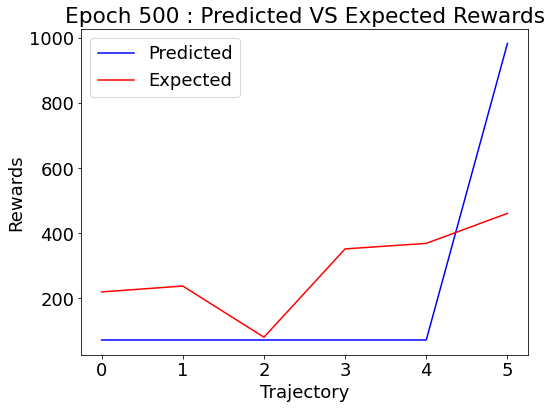

Epoch : 500, loss_train: 1520.1881, loss test: 16161.0908
Epoch : 501, loss_train: 1496.3152, loss test: 16385.3848
Epoch : 502, loss_train: 1538.4719, loss test: 16106.7246
Epoch : 503, loss_train: 1544.6971, loss test: 16090.1084
Epoch : 504, loss_train: 1561.3246, loss test: 16423.8438
Epoch : 505, loss_train: 1536.7798, loss test: 16089.1973
Epoch : 506, loss_train: 2309.0037, loss test: 15765.9570
Epoch : 507, loss_train: 1493.0837, loss test: 15881.3691
Epoch : 508, loss_train: 1581.3417, loss test: 15964.7578
Epoch : 509, loss_train: 1662.5062, loss test: 15743.3408
Epoch : 510, loss_train: 1857.7366, loss test: 15737.7588
Epoch : 511, loss_train: 1670.5131, loss test: 15912.3066
Epoch : 512, loss_train: 1578.5269, loss test: 15456.0430
Epoch : 513, loss_train: 1548.9238, loss test: 15017.0801
Epoch : 514, loss_train: 1462.0947, loss test: 15606.0518
Epoch : 515, loss_train: 1482.5721, loss test: 16583.7051
Epoch : 516, loss_train: 1464.5798, loss test: 15911.6406
Epoch : 517, l

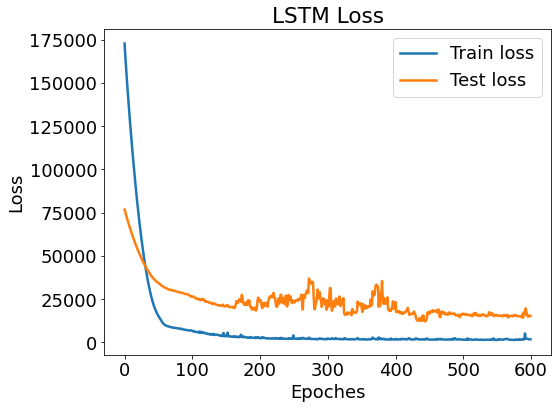



:::: (20/50) Start experiment 21 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 20
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 10
           env_n_trajectories : 5000
            env_perct_optimal : 0.5
               env_rew_factor : 0.1
                    n_epoches : 40
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.1
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                  

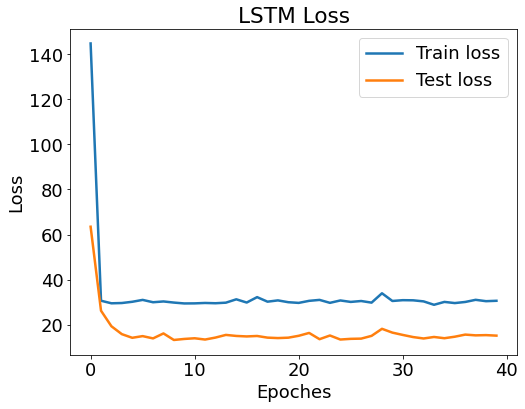



:::: (21/50) Start experiment 22 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 21
                     env_name : CartPole-v1
               env_batch_size : 8
            model_hidden_size : 20
           env_n_trajectories : 5000
            env_perct_optimal : 0.7
               env_rew_factor : 1.0
                    n_epoches : 20
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                

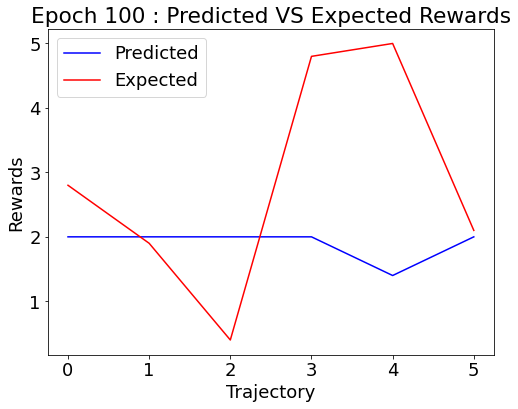

Epoch : 100, loss_train:   0.1431, loss test:   0.1425
Epoch : 101, loss_train:   0.1447, loss test:   0.1368
Epoch : 102, loss_train:   0.1404, loss test:   0.1576
Epoch : 103, loss_train:   0.1387, loss test:   0.1515
Epoch : 104, loss_train:   0.1386, loss test:   0.1545
Epoch : 105, loss_train:   0.1388, loss test:   0.1467
Epoch : 106, loss_train:   0.1502, loss test:   0.1572
Epoch : 107, loss_train:   0.1449, loss test:   0.1500
Epoch : 108, loss_train:   0.1418, loss test:   0.1535
Epoch : 109, loss_train:   0.1394, loss test:   0.1584
Epoch : 110, loss_train:   0.1342, loss test:   0.1545
Epoch : 111, loss_train:   0.1358, loss test:   0.1360
Epoch : 112, loss_train:   0.1364, loss test:   0.1622
Epoch : 113, loss_train:   0.1523, loss test:   0.1462
Epoch : 114, loss_train:   0.1418, loss test:   0.1314
Epoch : 115, loss_train:   0.1443, loss test:   0.1093
Epoch : 116, loss_train:   0.1604, loss test:   0.1486
Epoch : 117, loss_train:   0.1516, loss test:   0.1740
Epoch : 11

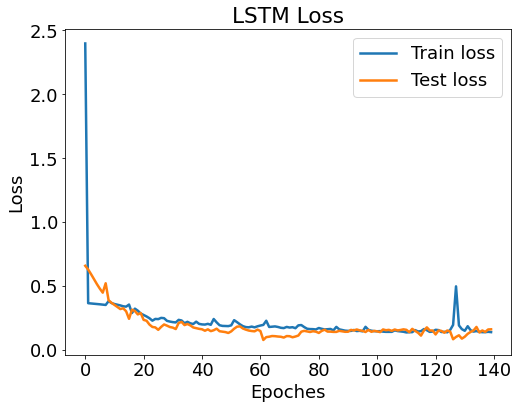



:::: (23/50) Start experiment 24 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 23
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 20
           env_n_trajectories : 4000
            env_perct_optimal : 0.3
               env_rew_factor : 0.01
                    n_epoches : 400
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
              

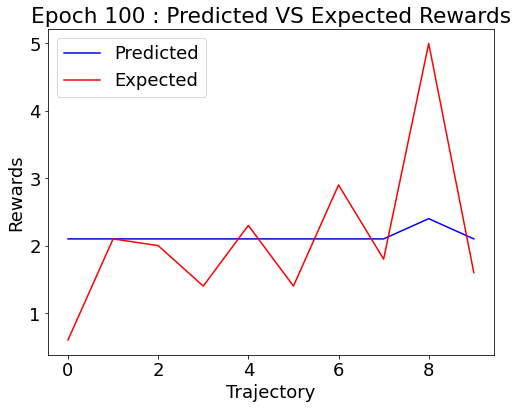

Epoch : 100, loss_train:   0.3626, loss test:   0.0067
Epoch : 101, loss_train:   0.3599, loss test:   0.0068
Epoch : 102, loss_train:   0.3616, loss test:   0.0066
Epoch : 103, loss_train:   0.3616, loss test:   0.0069
Epoch : 104, loss_train:   0.3627, loss test:   0.0067
Epoch : 105, loss_train:   0.3606, loss test:   0.0068
Epoch : 106, loss_train:   0.3631, loss test:   0.0065
Epoch : 107, loss_train:   0.3633, loss test:   0.0069
Epoch : 108, loss_train:   0.3700, loss test:   0.0067
Epoch : 109, loss_train:   0.3631, loss test:   0.0066
Epoch : 110, loss_train:   0.3615, loss test:   0.0067
Epoch : 111, loss_train:   0.3599, loss test:   0.0067
Epoch : 112, loss_train:   0.3597, loss test:   0.0067
Epoch : 113, loss_train:   0.3597, loss test:   0.0067
Epoch : 114, loss_train:   0.3598, loss test:   0.0067
Epoch : 115, loss_train:   0.3599, loss test:   0.0067
Epoch : 116, loss_train:   0.3599, loss test:   0.0067
Epoch : 117, loss_train:   0.3600, loss test:   0.0067
Epoch : 11

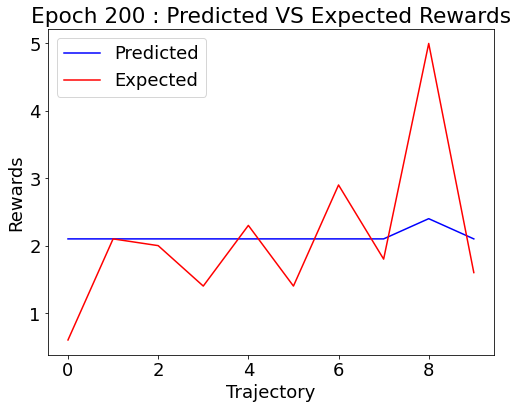

Epoch : 200, loss_train:   0.3599, loss test:   0.0067
Epoch : 201, loss_train:   0.3599, loss test:   0.0067
Epoch : 202, loss_train:   0.3599, loss test:   0.0067
Epoch : 203, loss_train:   0.3599, loss test:   0.0067
Epoch : 204, loss_train:   0.3599, loss test:   0.0067
Epoch : 205, loss_train:   0.3599, loss test:   0.0067
Epoch : 206, loss_train:   0.3599, loss test:   0.0067
Epoch : 207, loss_train:   0.3599, loss test:   0.0067
Epoch : 208, loss_train:   0.3599, loss test:   0.0067
Epoch : 209, loss_train:   0.3599, loss test:   0.0067
Epoch : 210, loss_train:   0.3599, loss test:   0.0067
Epoch : 211, loss_train:   0.3599, loss test:   0.0067
Epoch : 212, loss_train:   0.3599, loss test:   0.0067
Epoch : 213, loss_train:   0.3599, loss test:   0.0067
Epoch : 214, loss_train:   0.3599, loss test:   0.0067
Epoch : 215, loss_train:   0.3599, loss test:   0.0067
Epoch : 216, loss_train:   0.3599, loss test:   0.0067
Epoch : 217, loss_train:   0.3599, loss test:   0.0067
Epoch : 21

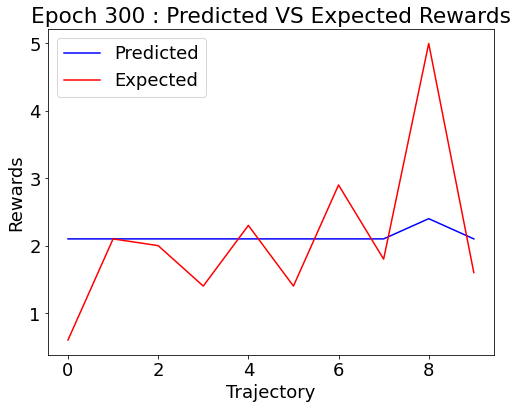

Epoch : 300, loss_train:   0.3599, loss test:   0.0067
Epoch : 301, loss_train:   0.3599, loss test:   0.0067
Epoch : 302, loss_train:   0.3599, loss test:   0.0067
Epoch : 303, loss_train:   0.3599, loss test:   0.0067
Epoch : 304, loss_train:   0.3599, loss test:   0.0067
Epoch : 305, loss_train:   0.3599, loss test:   0.0067
Epoch : 306, loss_train:   0.3599, loss test:   0.0067
Epoch : 307, loss_train:   0.3599, loss test:   0.0067
Epoch : 308, loss_train:   0.3599, loss test:   0.0067
Epoch : 309, loss_train:   0.3599, loss test:   0.0067
Epoch : 310, loss_train:   0.3599, loss test:   0.0067
Epoch : 311, loss_train:   0.3599, loss test:   0.0067
Epoch : 312, loss_train:   0.3599, loss test:   0.0067
Epoch : 313, loss_train:   0.3599, loss test:   0.0067
Epoch : 314, loss_train:   0.3599, loss test:   0.0067
Epoch : 315, loss_train:   0.3599, loss test:   0.0067
Epoch : 316, loss_train:   0.3599, loss test:   0.0067
Epoch : 317, loss_train:   0.3599, loss test:   0.0067
Epoch : 31

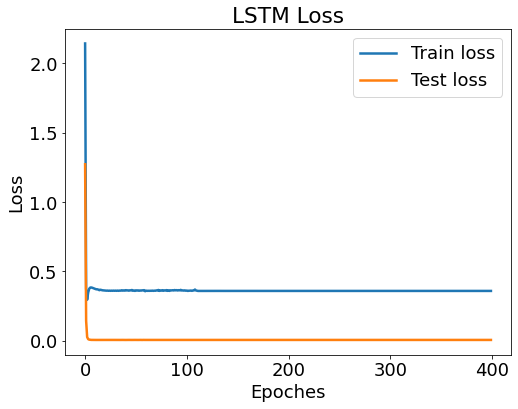



:::: (24/50) Start experiment 25 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 24
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 30
           env_n_trajectories : 4000
            env_perct_optimal : 0.5
               env_rew_factor : 0.01
                    n_epoches : 40
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
             

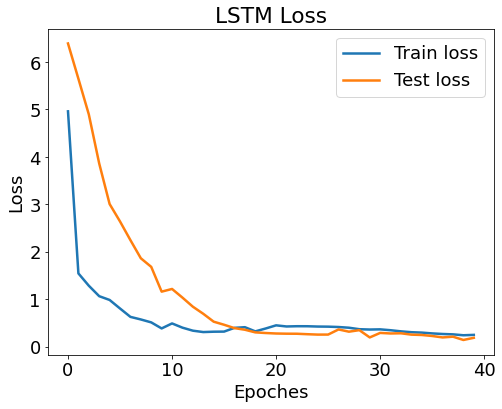



:::: (25/50) Start experiment 26 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 25
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 30
           env_n_trajectories : 3000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 40
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.1
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

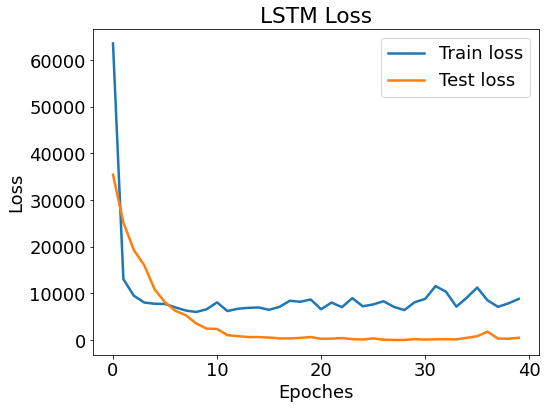



:::: (26/50) Start experiment 27 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 26
                     env_name : CartPole-v1
               env_batch_size : 6
            model_hidden_size : 15
           env_n_trajectories : 3000
            env_perct_optimal : 0.3
               env_rew_factor : 1.0
                    n_epoches : 100
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
              

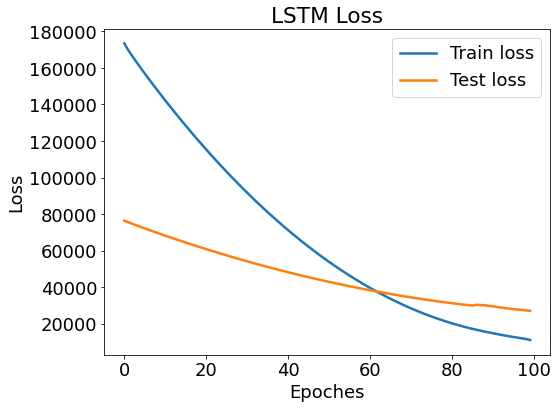



:::: (27/50) Start experiment 28 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 27
                     env_name : CartPole-v1
               env_batch_size : 8
            model_hidden_size : 40
           env_n_trajectories : 5000
            env_perct_optimal : 0.6
               env_rew_factor : 1.0
                    n_epoches : 20
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

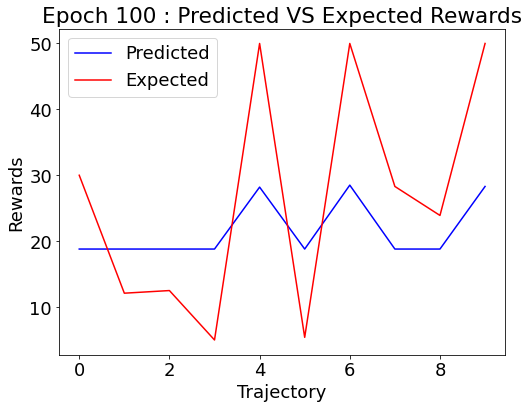

Epoch : 100, loss_train:  22.8116, loss test:   7.5882
Epoch : 101, loss_train:  23.5785, loss test:   4.4338
Epoch : 102, loss_train:  23.8202, loss test:   6.9414
Epoch : 103, loss_train:  22.5265, loss test:   6.0434
Epoch : 104, loss_train:  22.6293, loss test:   4.8200
Epoch : 105, loss_train:  21.8274, loss test:   5.8059
Epoch : 106, loss_train:  24.8071, loss test:   6.9231
Epoch : 107, loss_train:  24.4128, loss test:   9.1461
Epoch : 108, loss_train:  25.1575, loss test:   5.5160
Epoch : 109, loss_train:  22.4045, loss test:   5.7758
Epoch : 110, loss_train:  23.3991, loss test:   4.5181
Epoch : 111, loss_train:  20.6440, loss test:   7.0905
Epoch : 112, loss_train:  25.1352, loss test:   4.7266
Epoch : 113, loss_train:  21.7016, loss test:   6.3658
Epoch : 114, loss_train:  26.6939, loss test:   6.4899
Epoch : 115, loss_train:  20.7978, loss test:   6.3689
Epoch : 116, loss_train:  22.6412, loss test:   5.6911
Epoch : 117, loss_train:  21.7638, loss test:   5.0034
Epoch : 11

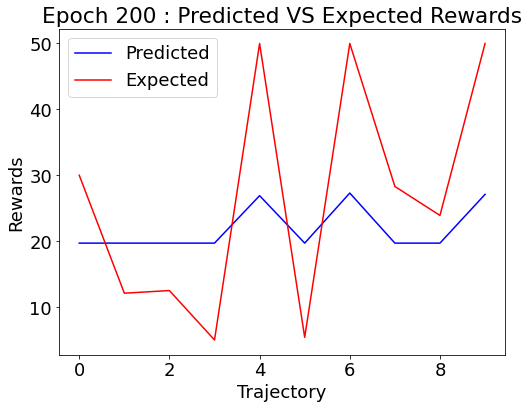

Epoch : 200, loss_train:  25.6036, loss test:   4.2565
Epoch : 201, loss_train:  24.5460, loss test:   5.8046
Epoch : 202, loss_train:  22.0506, loss test:   5.3645
Epoch : 203, loss_train:  22.1761, loss test:   5.7168
Epoch : 204, loss_train:  24.9408, loss test:   6.6962
Epoch : 205, loss_train:  23.4439, loss test:   4.3328
Epoch : 206, loss_train:  20.6933, loss test:   4.9340
Epoch : 207, loss_train:  22.5339, loss test:   4.6018
Epoch : 208, loss_train:  26.1087, loss test:   5.3537
Epoch : 209, loss_train:  22.5970, loss test:   6.0441
Epoch : 210, loss_train:  21.9495, loss test:   5.5727
Epoch : 211, loss_train:  26.3794, loss test:   6.9307
Epoch : 212, loss_train:  24.4100, loss test:   6.7633
Epoch : 213, loss_train:  25.9244, loss test:   6.0278
Epoch : 214, loss_train:  26.0349, loss test:   5.9680
Epoch : 215, loss_train:  20.6619, loss test:   5.7674
Epoch : 216, loss_train:  22.8875, loss test:   7.0416
Epoch : 217, loss_train:  23.3524, loss test:   6.2127
Epoch : 21

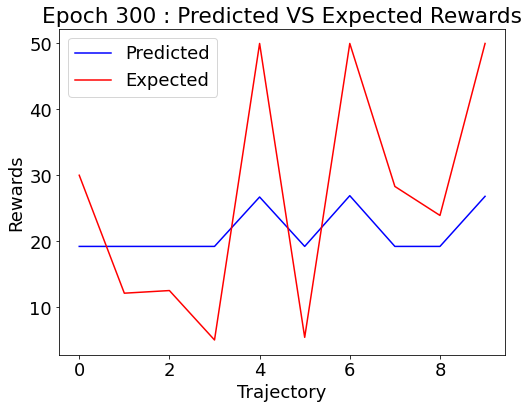

Epoch : 300, loss_train:  21.9640, loss test:   5.7527
Epoch : 301, loss_train:  23.8075, loss test:   6.3415
Epoch : 302, loss_train:  22.1665, loss test:   5.5220
Epoch : 303, loss_train:  23.5104, loss test:   4.1562
Epoch : 304, loss_train:  23.6909, loss test:   4.9722
Epoch : 305, loss_train:  22.2773, loss test:   5.4664
Epoch : 306, loss_train:  20.6881, loss test:   6.1250
Epoch : 307, loss_train:  22.8606, loss test:   5.4705
Epoch : 308, loss_train:  23.7081, loss test:   4.5163
Epoch : 309, loss_train:  22.9710, loss test:   4.7275
Epoch : 310, loss_train:  22.9937, loss test:   5.1468
Epoch : 311, loss_train:  22.5582, loss test:   6.7105
Epoch : 312, loss_train:  23.7654, loss test:   5.9309
Epoch : 313, loss_train:  22.1778, loss test:   4.0637
Epoch : 314, loss_train:  20.6965, loss test:   5.7451
Epoch : 315, loss_train:  22.9435, loss test:   5.7410
Epoch : 316, loss_train:  25.7108, loss test:   4.5154
Epoch : 317, loss_train:  21.7754, loss test:   6.0265
Epoch : 31

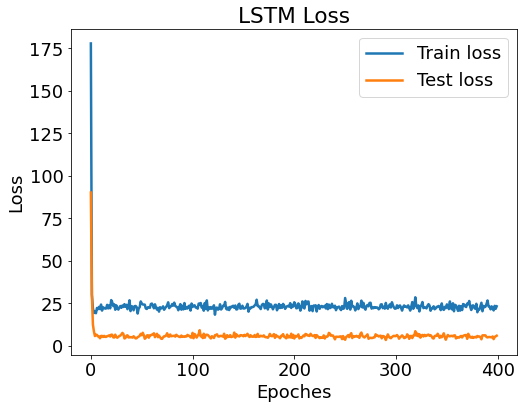



:::: (29/50) Start experiment 30 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 29
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 40
           env_n_trajectories : 4000
            env_perct_optimal : 0.5
               env_rew_factor : 0.1
                    n_epoches : 60
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
                 

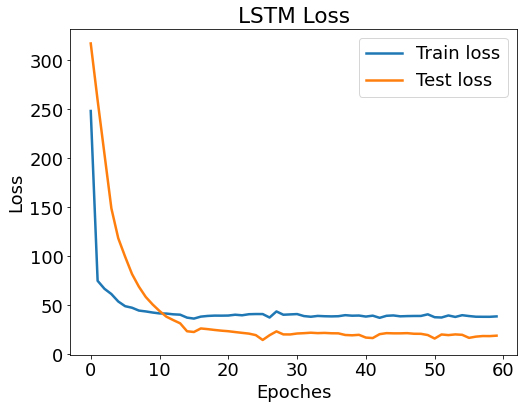



:::: (30/50) Start experiment 31 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 30
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 15
           env_n_trajectories : 3000
            env_perct_optimal : 0.7
               env_rew_factor : 1.0
                    n_epoches : 200
       optimizer_weight_decay : 0.001
                 optimizer_lr : 0.001
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
             

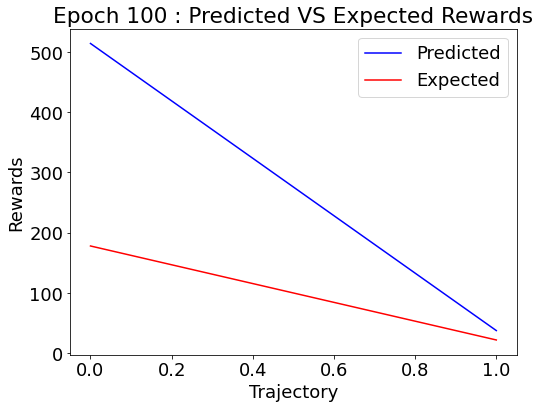

Epoch : 100, loss_train: 3578.2153, loss test: 22351.5078
Epoch : 101, loss_train: 3787.6118, loss test: 22323.6895
Epoch : 102, loss_train: 4193.7974, loss test: 22247.1934
Epoch : 103, loss_train: 3528.9231, loss test: 22217.0918
Epoch : 104, loss_train: 3426.6016, loss test: 22200.5977
Epoch : 105, loss_train: 3705.8721, loss test: 22232.0117
Epoch : 106, loss_train: 3524.2412, loss test: 22243.8574
Epoch : 107, loss_train: 3090.6453, loss test: 22224.3828
Epoch : 108, loss_train: 3102.1768, loss test: 22170.4336
Epoch : 109, loss_train: 3195.5120, loss test: 22122.1426
Epoch : 110, loss_train: 4286.3418, loss test: 22078.4805
Epoch : 111, loss_train: 3704.9314, loss test: 22018.6445
Epoch : 112, loss_train: 3030.3577, loss test: 21996.0762
Epoch : 113, loss_train: 3153.5479, loss test: 21966.7363
Epoch : 114, loss_train: 3387.9583, loss test: 21969.9941
Epoch : 115, loss_train: 3638.1052, loss test: 22004.0430
Epoch : 116, loss_train: 3311.5229, loss test: 21997.9160
Epoch : 117, l

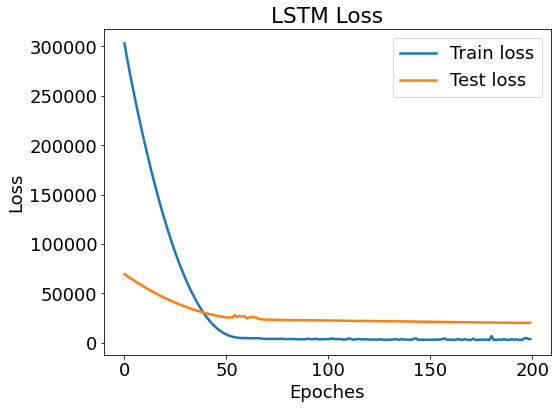



:::: (31/50) Start experiment 32 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 31
                     env_name : CartPole-v1
               env_batch_size : 10
            model_hidden_size : 15
           env_n_trajectories : 4000
            env_perct_optimal : 0.5
               env_rew_factor : 0.1
                    n_epoches : 20
       optimizer_weight_decay : 0.01
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

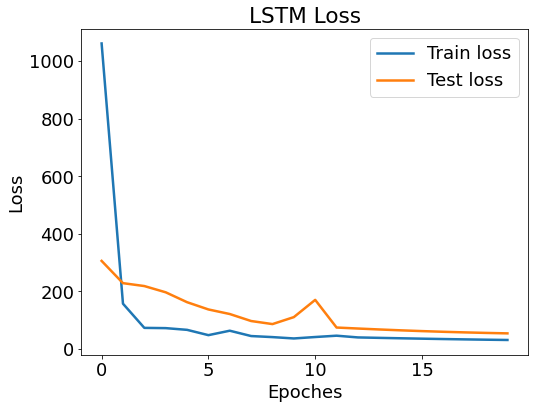



:::: (32/50) Start experiment 33 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   RudderLstmParameterSearchMap ›››
                    show_plot : True
                      spec_id : 32
                     env_name : CartPole-v1
               env_batch_size : 4
            model_hidden_size : 20
           env_n_trajectories : 4000
            env_perct_optimal : 0.5
               env_rew_factor : 0.01
                    n_epoches : 600
       optimizer_weight_decay : 0.1
                 optimizer_lr : 0.01
                         seed : 42
         paramSearchCallables :    RudderLstmExperimentSpec ›››
               env_batch_size : <function <lambda> at 0x7f1da9f50290>
            model_hidden_size : <function <lambda> at 0x7f1da9f50950>
           env_n_trajectories : <function <lambda> at 0x7f1da9f509e0>
            env_perct_optimal : <function <lambda> at 0x7f1da9f50a70>
               env_rew_factor : <function <lambda> at 0x7f1da9f50b00>
               

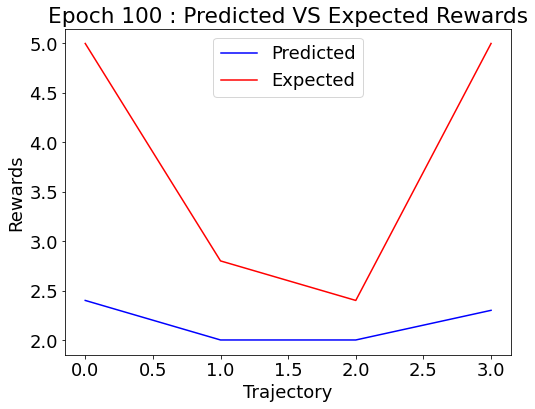

Epoch : 100, loss_train:   0.4230, loss test:   0.0235
Epoch : 101, loss_train:   0.4232, loss test:   0.0228
Epoch : 102, loss_train:   0.4224, loss test:   0.0230
Epoch : 103, loss_train:   0.4218, loss test:   0.0234
Epoch : 104, loss_train:   0.4182, loss test:   0.0233
Epoch : 105, loss_train:   0.4223, loss test:   0.0227
Epoch : 106, loss_train:   0.4213, loss test:   0.0233
Epoch : 107, loss_train:   0.4221, loss test:   0.0236
Epoch : 108, loss_train:   0.4239, loss test:   0.0237
Epoch : 109, loss_train:   0.4232, loss test:   0.0238
Epoch : 110, loss_train:   0.4248, loss test:   0.0237
Epoch : 111, loss_train:   0.4251, loss test:   0.0235
Epoch : 112, loss_train:   0.4254, loss test:   0.0233
Epoch : 113, loss_train:   0.4246, loss test:   0.0234
Epoch : 114, loss_train:   0.4229, loss test:   0.0235
Epoch : 115, loss_train:   0.4239, loss test:   0.0235
Epoch : 116, loss_train:   0.4220, loss test:   0.0233
Epoch : 117, loss_train:   0.4254, loss test:   0.0227
Epoch : 11

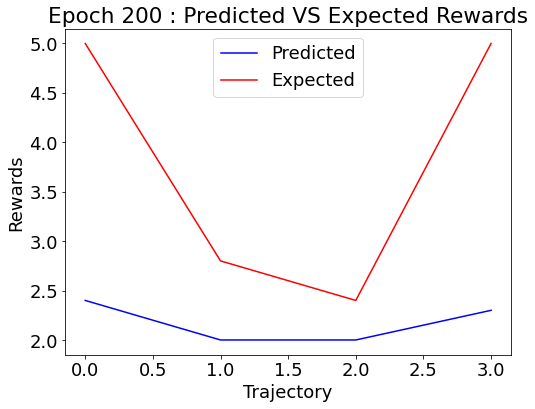

Epoch : 200, loss_train:   0.4229, loss test:   0.0231
Epoch : 201, loss_train:   0.4190, loss test:   0.0240
Epoch : 202, loss_train:   0.4211, loss test:   0.0230
Epoch : 203, loss_train:   0.4216, loss test:   0.0231
Epoch : 204, loss_train:   0.4211, loss test:   0.0232
Epoch : 205, loss_train:   0.4223, loss test:   0.0233
Epoch : 206, loss_train:   0.4202, loss test:   0.0233
Epoch : 207, loss_train:   0.4230, loss test:   0.0224
Epoch : 208, loss_train:   0.4220, loss test:   0.0231
Epoch : 209, loss_train:   0.4193, loss test:   0.0232
Epoch : 210, loss_train:   0.4160, loss test:   0.0225
Epoch : 211, loss_train:   0.4219, loss test:   0.0230
Epoch : 212, loss_train:   0.4226, loss test:   0.0231
Epoch : 213, loss_train:   0.4225, loss test:   0.0236
Epoch : 214, loss_train:   0.4233, loss test:   0.0234
Epoch : 215, loss_train:   0.4228, loss test:   0.0236
Epoch : 216, loss_train:   0.4220, loss test:   0.0236
Epoch : 217, loss_train:   0.4218, loss test:   0.0231
Epoch : 21

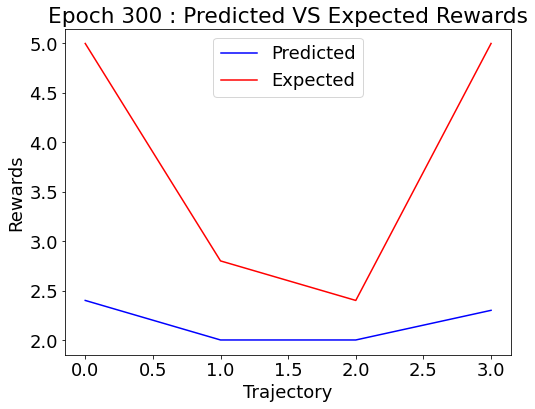

Epoch : 300, loss_train:   0.4216, loss test:   0.0238
Epoch : 301, loss_train:   0.4212, loss test:   0.0236
Epoch : 302, loss_train:   0.4231, loss test:   0.0231
Epoch : 303, loss_train:   0.4227, loss test:   0.0232
Epoch : 304, loss_train:   0.4240, loss test:   0.0226
Epoch : 305, loss_train:   0.4179, loss test:   0.0222
Epoch : 306, loss_train:   0.4228, loss test:   0.0226
Epoch : 307, loss_train:   0.4237, loss test:   0.0228
Epoch : 308, loss_train:   0.4236, loss test:   0.0227
Epoch : 309, loss_train:   0.4242, loss test:   0.0230
Epoch : 310, loss_train:   0.4218, loss test:   0.0233
Epoch : 311, loss_train:   0.4224, loss test:   0.0233
Epoch : 312, loss_train:   0.4216, loss test:   0.0230
Epoch : 313, loss_train:   0.4233, loss test:   0.0229
Epoch : 314, loss_train:   0.4245, loss test:   0.0225
Epoch : 315, loss_train:   0.4227, loss test:   0.0232
Epoch : 316, loss_train:   0.4211, loss test:   0.0237
Epoch : 317, loss_train:   0.4220, loss test:   0.0236
Epoch : 31

KeyboardInterrupt: ignored

In [12]:

result = execute_parameter_search(exp_spec, script_fct=script_rudder_lstm_main, exp_size=50, start_count_at=1)


---


In [ ]:
# !git add experiment/colab_experiment/run_output/\*.jpg
# !git add experiment_runner/experiment_spec.py

# !git commit -am "Colab run RedLeader962 E1"
# !git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all